In [108]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [109]:
# Read CSVs
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [110]:
# Print info of white wine
print(white.info())
white.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [111]:
# Print info of red wine
print(red.info())
red.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [112]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [113]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


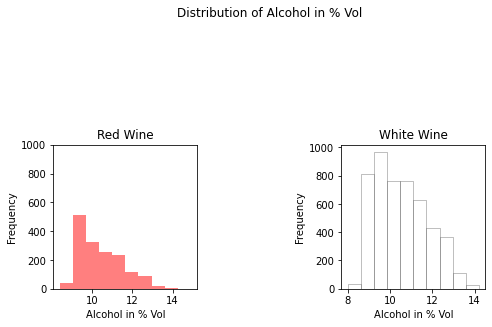

In [114]:
# Visualize the data
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

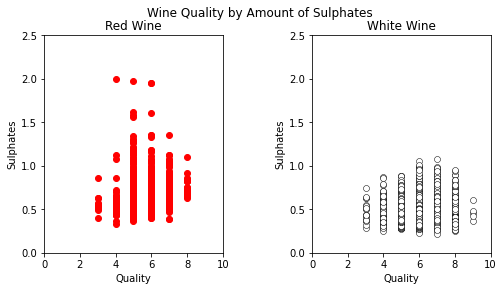

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

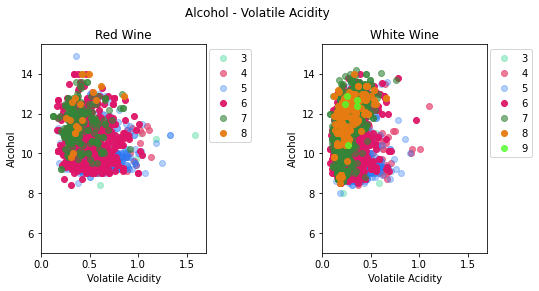

In [116]:
np.random.seed(570)

red_labels = np.unique(red['quality'])
white_labels = np.unique(white['quality'])

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
red_colors = np.random.rand(6,4)
white_colors = np.append(red_colors, np.random.rand(1,4), axis=0)

for i in range(len(red_colors)):
    red_y = red['alcohol'][red.quality == red_labels[i]]
    red_x = red['volatile acidity'][red.quality == red_labels[i]]
    ax[0].scatter(red_x, red_y, c=red_colors[i].reshape(1,-1))

for i in range(len(white_colors)):
    white_y = white['alcohol'][white.quality == white_labels[i]]
    white_x = white['volatile acidity'][white.quality == white_labels[i]]
    ax[1].scatter(white_x, white_y, c=white_colors[i].reshape(1,-1))
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")

ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])

ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])

ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")

ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 

ax[0].legend(red_labels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(white_labels, loc='best', bbox_to_anchor=(1.3, 1))

fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

In [117]:
# Add type column
red["type"] = "Red"
white["type"] = "White"

In [118]:
wines = pd.concat([red, white], ignore_index=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


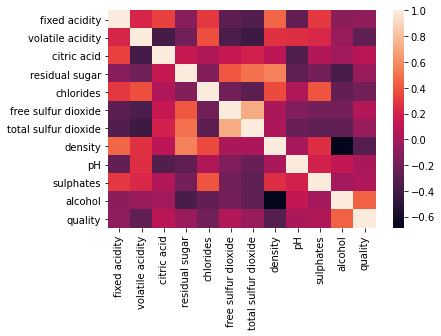

In [119]:
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [120]:
X = wines.drop(columns=["type"])
y = wines["type"].reshape(-1, 1)

print("X shape:", np.shape(X))
print("y shape:", np.shape(y))

X shape: (6497, 12)
y shape: (6497, 1)


In [121]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape, y_train.shape)

(5197, 12) (5197, 1)


In [130]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [122]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

print(X_train.shape, y_train.shape)

(5197, 12) (5197, 2)


In [138]:
# Define the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Train the model
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['acc']
)
                   
history = model.fit(
  X_train, y_train,
  epochs=20, 
  batch_size=1,
  validation_split=0.15,
  shuffle=True
)

Epoch 1/20
4417/4417 [==============================] - 11s 2ms/step - loss: 0.1704 - acc: 0.9414 - val_loss: 0.0392 - val_acc: 0.9974
Epoch 2/20
4417/4417 [==============================] - 10s 2ms/step - loss: 0.0228 - acc: 0.9940 - val_loss: 0.0449 - val_acc: 0.9962
Epoch 3/20
4417/4417 [==============================] - 10s 2ms/step - loss: 0.0239 - acc: 0.9957 - val_loss: 0.0532 - val_acc: 0.9962
Epoch 4/20
4417/4417 [==============================] - 10s 2ms/step - loss: 0.0137 - acc: 0.9971 - val_loss: 0.0560 - val_acc: 0.9962
Epoch 5/20
4417/4417 [==============================] - 10s 2ms/step - loss: 0.0100 - acc: 0.9979 - val_loss: 0.0577 - val_acc: 0.9974
Epoch 6/20
4417/4417 [==============================] - 10s 2ms/step - loss: 0.0135 - acc: 0.9970 - val_loss: 0.0653 - val_acc: 0.9974
Epoch 7/20
4417/4417 [==============================] - 10s 2ms/step - loss: 0.0108 - acc: 0.9972 - val_loss: 0.0711 - val_acc: 0.9974
Epoch 8/20
4417/4417 [==============================] -

In [139]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 16)                208       
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 18        
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________


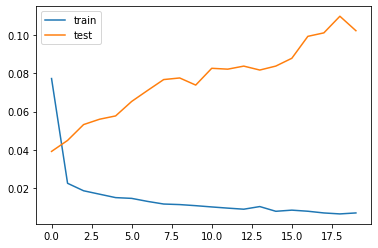

In [140]:
# Show model training graph
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [141]:
# Evaluate the model
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.0529 - acc: 0.9954


[0.05290072411298752, 0.9953846335411072]

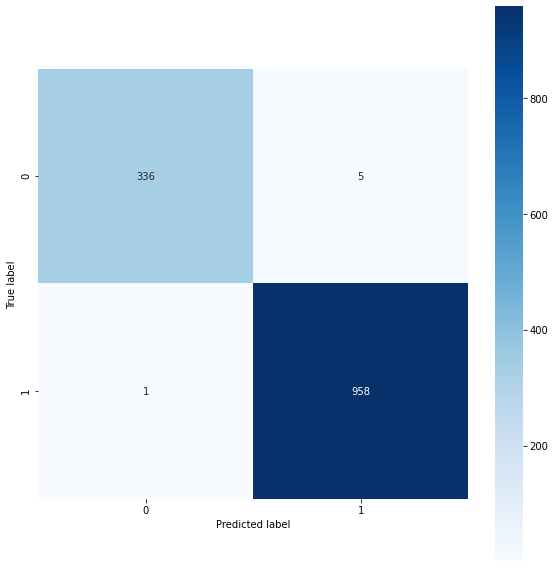

In [142]:
# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)

y_test_round = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_round, y_pred)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, square=True, fmt="")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [143]:
print("Precision:", precision_score(y_test_round, y_pred))
print("Recall:", recall_score(y_test_round, y_pred))
print("F1 score:", f1_score(y_test_round,y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test_round, y_pred))

Precision: 0.9948078920041536
Recall: 0.9989572471324296
F1 score: 0.9968782518210196
Cohen's Kappa: 0.9880288412839221
